In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
from nltk.tokenize import word_tokenize
from scipy import sparse
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train_data[classes].values

In [4]:
train_sentences = train_data["comment_text"].fillna("fillna").str.lower()
test_sentences = test_data["comment_text"].fillna("fillna").str.lower()

In [5]:
max_features = 100000
max_len = 150
embed_size = 300

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [7]:
train_data['comment_text'] = train_data['comment_text'].map(lambda com : clean_text(str(com)))
test_data['comment_text'] = test_data['comment_text'].map(lambda com : clean_text(str(com)))
train_data['comment_text'][0]
test_data['comment_text'][0]

'yo bitch ja rule is more succesful then you will ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time'

In [8]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

train_data_tfidf = tfidf_vectorizer.fit_transform(train_data['comment_text'])
test_data_tfidf = tfidf_vectorizer.fit_transform(test_data['comment_text'])

In [9]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [10]:
tr_vect = vect_word.fit_transform(train_data['comment_text'])
ts_vect = vect_word.transform(test_data['comment_text'])

# Character n gram vector
tr_vect_char = vect_char.fit_transform(train_data['comment_text'])
ts_vect_char = vect_char.transform(test_data['comment_text'])

In [11]:
X = sparse.hstack([tr_vect, tr_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])

In [12]:
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = train_data[target_col]
del tr_vect, ts_vect, tr_vect_char, ts_vect_char

In [13]:
prd = np.zeros((x_test.shape[0],y.shape[1]))
cv_score =[]

col = 'toxic'
i=0

lr_toxic = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_toxic.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_toxic.predict_proba(x_test)[:,1]

Building 0 model for column:toxic


In [14]:
col = 'severe_toxic'
i=1

lr_sever_toxic = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_sever_toxic.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_sever_toxic.predict_proba(x_test)[:,1]

Building 1 model for column:severe_toxic


In [15]:
col = 'obscene'
i=2

lr_obscene = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_obscene.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_obscene.predict_proba(x_test)[:,1]

Building 2 model for column:obscene


In [16]:
col = 'threat'
i=3

lr_threat = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_threat.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_threat.predict_proba(x_test)[:,1]

Building 3 model for column:threat


In [17]:
col = 'insult'
i=4

lr_insult = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_insult.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_insult.predict_proba(x_test)[:,1]

Building 4 model for column:insult


In [18]:
col = 'identity_hate'
i=5

lr_identity_hate = LogisticRegression(solver='sag')
print('Building {} model for column:{''}'.format(i,col)) 
lr_identity_hate.fit(X,y[col])
#cv_score.append(lr.score)
prd[:,i] = lr_identity_hate.predict_proba(x_test)[:,1]

Building 5 model for column:identity_hate


In [20]:
col = 'identity_hate'
print("Column:",col)
pred =  lr_identity_hate.predict(X)
print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
print(classification_report(y[col],pred))

Column: identity_hate

Confusion matrix
 [[158069     97]
 [   928    477]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    158166
           1       0.83      0.34      0.48      1405

    accuracy                           0.99    159571
   macro avg       0.91      0.67      0.74    159571
weighted avg       0.99      0.99      0.99    159571



Column: identity_hate


Text(0.5, 1.0, 'Reciever Operating Characteristic')

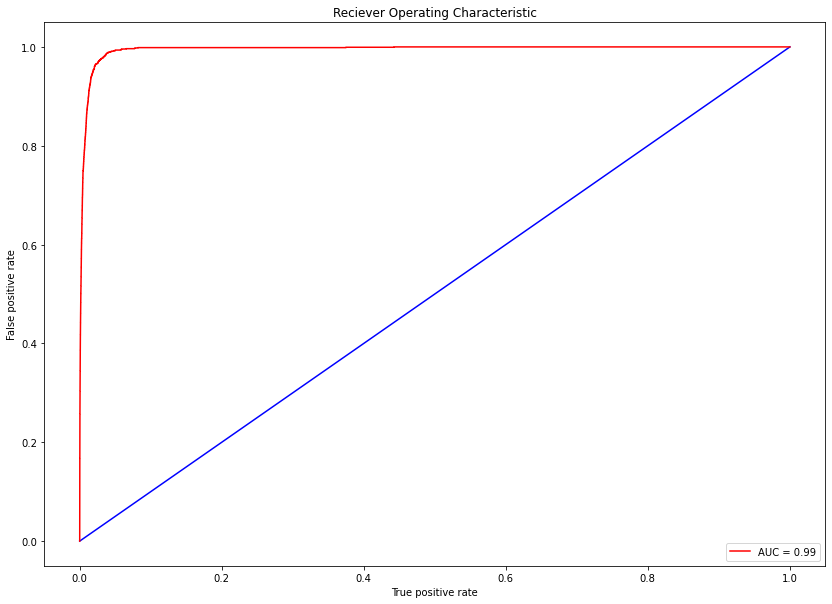

In [21]:
col = 'identity_hate'
print("Column:",col)
pred_pro = lr_identity_hate.predict_proba(X)[:,1]
frp,trp,thres = roc_curve(y[col],pred_pro)
auc_val =auc(frp,trp)
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],color='b')
plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
plt.legend(loc='lower right')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Reciever Operating Characteristic')

In [22]:
prd_1 = pd.DataFrame(prd,columns=y.columns)
submit = pd.concat([test_data['id'],prd_1],axis=1)
#submit.to_csv('toxic_lr.csv.gz',compression='gzip',index=False)
submit.to_csv('toxic_lr.csv',index=False)
print(submit)

                      id     toxic  severe_toxic   obscene    threat  \
0       00001cee341fdb12  0.999970      0.238922  0.999862  0.053469   
1       0000247867823ef7  0.003831      0.001505  0.001746  0.000597   
2       00013b17ad220c46  0.007867      0.001813  0.004353  0.000615   
3       00017563c3f7919a  0.003507      0.001363  0.002345  0.000548   
4       00017695ad8997eb  0.015800      0.002287  0.005614  0.000699   
...                  ...       ...           ...       ...       ...   
153159  fffcd0960ee309b5  0.607782      0.002378  0.082177  0.000863   
153160  fffd7a9a6eb32c16  0.039398      0.003361  0.015625  0.001602   
153161  fffda9e8d6fafa9e  0.003382      0.001003  0.006665  0.000446   
153162  fffe8f1340a79fc2  0.012858      0.001100  0.005841  0.000968   
153163  ffffce3fb183ee80  0.982608      0.001475  0.798298  0.005207   

          insult  identity_hate  
0       0.988853       0.449966  
1       0.005231       0.002362  
2       0.005424       0.001998  

In [29]:
random_comment = ['He is a ass hole']
ra_ts_vect = vect_word.transform(random_comment)
ra_ts_vect_char = vect_char.transform(random_comment)
ra_x_test = sparse.hstack([ra_ts_vect, ra_ts_vect_char])

ra_prd = np.zeros((ra_x_test.shape[0],y.shape[1]))

i=0
ra_prd[:,i] = lr_toxic.predict_proba(ra_x_test)[:,1]

i=1
ra_prd[:,i] = lr_sever_toxic.predict_proba(ra_x_test)[:,1]

i=2
ra_prd[:,i] = lr_obscene.predict_proba(ra_x_test)[:,1]

i=3
ra_prd[:,i] = lr_threat.predict_proba(ra_x_test)[:,1]

i=4
ra_prd[:,i] = lr_insult.predict_proba(ra_x_test)[:,1]

i=5
ra_prd[:,i] = lr_identity_hate.predict_proba(ra_x_test)[:,1]

In [30]:
print(ra_prd)

[[0.9995048  0.06775568 0.99846447 0.01165689 0.97313201 0.03419621]]
